In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_circuit_layout
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [ ]:
from cobos.tokens import ibm_token
# Get device as a target
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend('ibm_sherbrooke')
target = backend.target

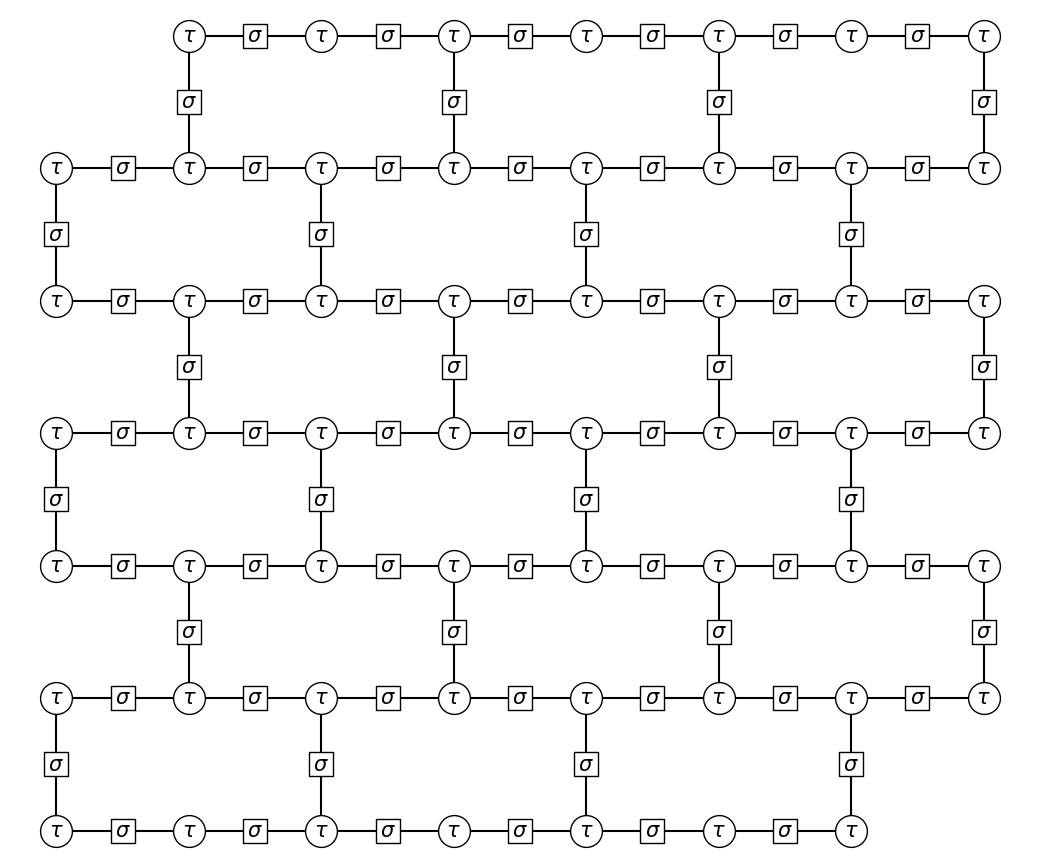

In [11]:
from z2hex import geometry, circs
lattice = geometry.HeavyHexLattice(3, 6)
qc = circs.TotalInteractionPropagator(lattice, False)
lattice.plot_lattice()
num_qubits = len(lattice.coords)

In [17]:
layouts = lattice.get_all_layouts(backend)

In [18]:
print('Num of layouts: ', len(layouts))

Num of layouts:  1


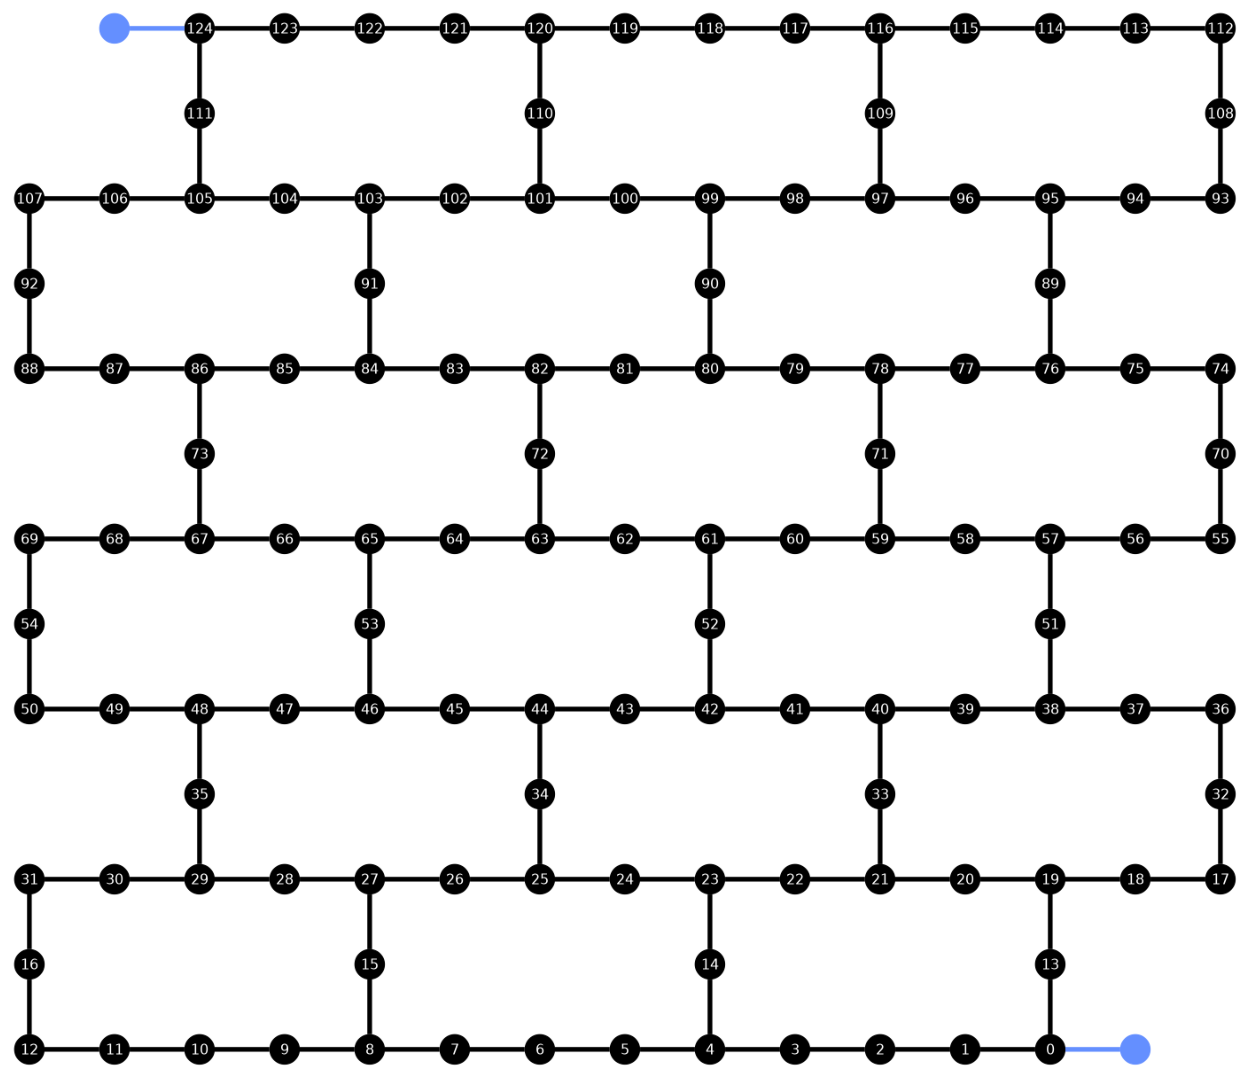

In [21]:
# Draw a layout
index = 0
layout = list(layouts[index])
pm = generate_preset_pass_manager(3, target=target, initial_layout=layout)
qc_layout = pm.run(qc)
plot_circuit_layout(qc_layout, backend, view='virtual')